Explore the datasets. 
E.g. size, class distribution

Use mixup between SleepEEG and FD_A with 20 different lambda and mixup weights from uniform(0, lambda) and plot the dataset Fourier-transsfform distribution.

First the distribution of labels

In [23]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt 
import pandas as pd
# from scipy.fft import fft, fftfreq

#import pickle
#import scipy

In [24]:
dirname_lst = ['SleepEEG', 'Epilepsy', 'FD_A', 'FD_B', 'HAR', 'Gesture', 'ECG', 'EMG']

In [25]:
def open_dataset(path):
    #Loads in train, val and test datasets
    dall = {}
    train = torch.load(os.path.join(path+"train.pt"))
    val = torch.load(os.path.join(path+"val.pt"))
    test = torch.load(os.path.join(path+"test.pt"))
    dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
    dall['labels'] = torch.cat((train['labels'], val['labels'], test['labels']), dim=0)

    #print("train, val, test shape: ", train["samples"].shape, val["samples"].shape, test["samples"].shape)
    #print("dall samples shape: ", dall['samples'].shape)

    return dall

### The plot of the label distribution

/tmp/ipykernel_3427150/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
/tmp/ipykernel_3427150/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.cat((torch.tensor(train['samples']), torch.tensor(val['samples']), torch.tensor(test['samples'])), dim=0)
/tmp/ipykernel_3427150/1786238868.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dall['samples'] = torch.ca

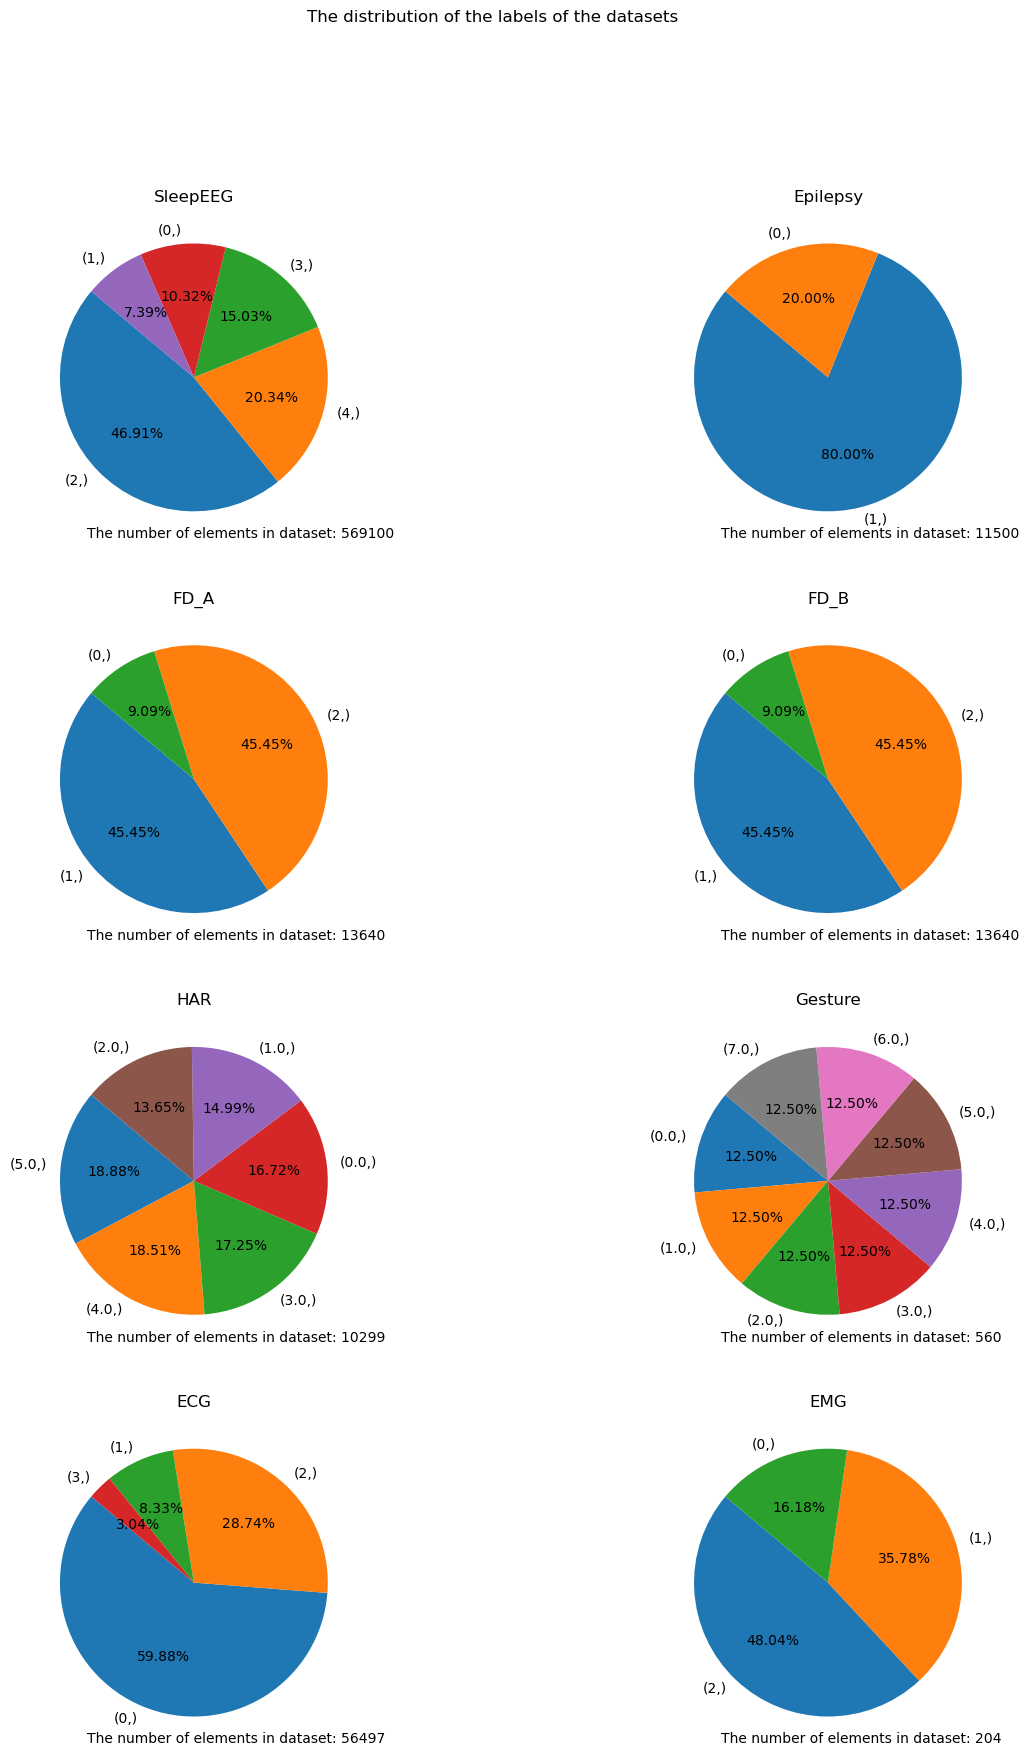

In [54]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

fig, axes = plt.subplots(4,2, figsize=(15,20))

fig.suptitle("The distribution of the labels of the datasets")
for dirname, ax in list(zip(dirname_lst, axes.flatten())):
    labels = open_dataset(f"datasets/{dirname}/")["labels"]
    number_of_elements = labels.shape[0]

    # Count occurrences of each label
    df = pd.DataFrame(labels)
    label_counts = df.value_counts()
    
    # Extract labels and counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values)

    # Plotting the pie chart
    ax.set_title(f"{dirname}")
    ax.text(-0.8, -1.2, f"The number of elements in dataset: {number_of_elements}")
    ax.pie(counts, labels=labels, autopct='%1.2f%%', startangle=140)


## The plot of change in SleepEEG's Fourier coefficients while we add additional elements to the datset using mixup with different lambdas